I downloaded this data from https://databank.worldbank.org/indicator and filtered "health, nutrition and population" parameters specific to Nigeria, Benin, Burkina Faso,  Cameroun,Chad, Equitorial Guinea, Ghana, Niger, Sierre Leone and Togo. I simply want to know how Nigeria fares in some of those indicators in relation to countries around it. It contains data from 1960 to 2021

In [1]:
pwd

'C:\\Users\\chidimmpe\\Downloads'

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

In [2]:
health_data = pd.read_csv("./Data countries around Nigeria.csv")
health_data.head()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Survival to age 65, female (% of cohort)",SP.DYN.TO65.FE.ZS,Nigeria,NGA,29.3704606,29.9731888,30.575917,31.0626312,31.5493454,32.0360596,...,46.797524,47.502328,48.207132,48.911936,49.61674,50.321544,50.8325194,51.3434948,..,..
1,"Survival to age 65, female (% of cohort)",SP.DYN.TO65.FE.ZS,Ghana,GHA,40.025135,40.72216,41.419185,41.941849,42.464513,42.987177,...,62.954324,63.5739886,64.1936532,64.8133178,65.4329824,66.052647,66.5222738,66.9919006,..,..
2,"Survival to age 65, female (% of cohort)",SP.DYN.TO65.FE.ZS,Cameroon,CMR,35.6551314,36.2696442,36.884157,37.489138,38.094119,38.6991,...,53.185521,53.9576392,54.7297574,55.5018756,56.2739938,57.046112,57.588547,58.130982,..,..
3,"Survival to age 65, female (% of cohort)",SP.DYN.TO65.FE.ZS,Sierra Leone,SLE,23.9695026,24.3184338,24.667365,25.16307,25.658775,26.15448,...,45.232983,45.8849908,46.5369986,47.1890064,47.8410142,48.493022,49.0448354,49.5966488,..,..
4,"Survival to age 65, female (% of cohort)",SP.DYN.TO65.FE.ZS,Togo,TGO,33.6360672,34.6105146,35.584962,36.5710082,37.5570544,38.5431006,...,58.301692,58.8143194,59.3269468,59.8395742,60.3522016,60.864829,61.4284818,61.9921346,..,..


Data looks quite ambigous so would have to look at columns and rows details

Looking through the data reveals that the second row "series name" contains the title of the different parameters presented in the other rows. To know what these titles are, and to determine which ones are relevant to my interests, I have to list them out

In [3]:

list(health_data["Series Name"])

['Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, female (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Survival to age 65, male (% of cohort)',
 'Completeness of birth registration, rural (%)',
 'Completeness of birth registration, rural (%)',
 'Completeness of bi

It is difficult to interpret the the diffrent outputs in this format so it is necessary to identify the unique parameters

In [4]:
parameter_types = np.unique(list(health_data["Series Name"])) 
print(parameter_types)

['AIDS estimated deaths (UNAIDS estimates)'
 'ARI treatment (% of children under 5 taken to a health provider)'
 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
 'Adults (ages 15+) and children (0-14 years) living with HIV'
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV'
 'Adults (ages 15+) living with HIV'
 'Adults (ages 15-49) newly infected with HIV'
 'Age at first marriage, female' 'Age at first marriage, male'
 'Antiretroviral therapy coverage (% of people living with HIV)'
 'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)'
 'Births attended by skilled health staff (% of total)'
 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'
 'Cause of death, by injury (% of total)'
 'Cause of death, by non-communicable diseases (% of total)'
 'Children (0-14) living with HIV'
 'Children (ages 0-14) newly infected with HIV'
 'Children orphaned by HIV/AIDS'
 'Children with

In [40]:
print(len(parameter_types))

156


The parameters are 156 unique types. I want to look at maternal health indices such as "age at first marriage","contraceptive prevalence", "maternal mortality rates" etc.

In [5]:
#The country code is not exactly relevant for this exercise so I will have to drop those columns
health_data = health_data.drop(["Series Code", "Country Code"], axis= 1)
health_data.head()

,Series Name,Country Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Survival to age 65, female (% of cohort)",Nigeria,29.3704606,29.9731888,30.575917,31.0626312,31.5493454,32.0360596,32.5227738,33.009488,...,46.797524,47.502328,48.207132,48.911936,49.61674,50.321544,50.8325194,51.3434948,..,..
1,"Survival to age 65, female (% of cohort)",Ghana,40.025135,40.72216,41.419185,41.941849,42.464513,42.987177,43.509841,44.032505,...,62.954324,63.5739886,64.1936532,64.8133178,65.4329824,66.052647,66.5222738,66.9919006,..,..
2,"Survival to age 65, female (% of cohort)",Cameroon,35.6551314,36.2696442,36.884157,37.489138,38.094119,38.6991,39.304081,39.909062,...,53.185521,53.9576392,54.7297574,55.5018756,56.2739938,57.046112,57.588547,58.130982,..,..
3,"Survival to age 65, female (% of cohort)",Sierra Leone,23.9695026,24.3184338,24.667365,25.16307,25.658775,26.15448,26.650185,27.14589,...,45.232983,45.8849908,46.5369986,47.1890064,47.8410142,48.493022,49.0448354,49.5966488,..,..
4,"Survival to age 65, female (% of cohort)",Togo,33.6360672,34.6105146,35.584962,36.5710082,37.5570544,38.5431006,39.5291468,40.515193,...,58.301692,58.8143194,59.3269468,59.8395742,60.3522016,60.864829,61.4284818,61.9921346,..,..


In [7]:
health_data=health_data.set_index("Series Name")
maternal_health_df = health_data.loc[["Lifetime risk of maternal death (%)" ]]
maternal_health_df.head()

,Country Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
Series Name,,,,,,,,,,,,,,,,,,,,,
Lifetime risk of maternal death (%),Nigeria,..,..,..,..,..,..,..,..,..,...,5.35605750424166,5.26199330999004,5.17907962396036,5.05556868961905,4.96568115045539,4.85668602392368,..,..,..,..
Lifetime risk of maternal death (%),Ghana,..,..,..,..,..,..,..,..,..,...,1.41026902965137,1.37481186436955,1.3367992292712,1.30119961441591,1.25968422996264,1.22065770920856,..,..,..,..
Lifetime risk of maternal death (%),Cameroon,..,..,..,..,..,..,..,..,..,...,2.98340029093005,2.89206172130652,2.82313554965897,2.73167282191659,2.61579093008446,2.53131026574302,..,..,..,..
Lifetime risk of maternal death (%),Sierra Leone,..,..,..,..,..,..,..,..,..,...,5.90089901555773,5.62155985268605,5.40011979826818,5.37109902608715,5.00175935772937,4.89551593116302,..,..,..,..
Lifetime risk of maternal death (%),Togo,..,..,..,..,..,..,..,..,..,...,2.00033478786224,1.94286912535182,1.89823992817961,1.8548471815297,1.81169749417176,1.78703556330648,..,..,..,..


In [9]:
maternal_health_df = maternal_health_df.drop(["1960 [YR1960]", "1961 [YR1961]", "1962 [YR1962]", "1963 [YR1963]", "1964 [YR1964]", "1965 [YR1965]", 
                         "1966 [YR1966]", "1967 [YR1967]", "1968 [YR1968]", "1969 [YR1969]", "1970 [YR1970]"], axis=1)
maternal_health_df.head()

,Country Name,1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
Series Name,,,,,,,,,,,,,,,,,,,,,
Lifetime risk of maternal death (%),Nigeria,..,..,..,..,..,..,..,..,..,...,5.35605750424166,5.26199330999004,5.17907962396036,5.05556868961905,4.96568115045539,4.85668602392368,..,..,..,..
Lifetime risk of maternal death (%),Ghana,..,..,..,..,..,..,..,..,..,...,1.41026902965137,1.37481186436955,1.3367992292712,1.30119961441591,1.25968422996264,1.22065770920856,..,..,..,..
Lifetime risk of maternal death (%),Cameroon,..,..,..,..,..,..,..,..,..,...,2.98340029093005,2.89206172130652,2.82313554965897,2.73167282191659,2.61579093008446,2.53131026574302,..,..,..,..
Lifetime risk of maternal death (%),Sierra Leone,..,..,..,..,..,..,..,..,..,...,5.90089901555773,5.62155985268605,5.40011979826818,5.37109902608715,5.00175935772937,4.89551593116302,..,..,..,..
Lifetime risk of maternal death (%),Togo,..,..,..,..,..,..,..,..,..,...,2.00033478786224,1.94286912535182,1.89823992817961,1.8548471815297,1.81169749417176,1.78703556330648,..,..,..,..


In [11]:
maternal_health_df= maternal_health_df.reset_index()

I will unpivot the data to make it easier to make charts for visualization

In [12]:
 maternal_health_df = pd.melt(maternal_health_df , id_vars = ["Series Name", "Country Name"], var_name = "Year", value_name = "Rate")
maternal_health_df .head()

,Series Name,Country Name,Year,Rate
0,Lifetime risk of maternal death (%),Nigeria,1971 [YR1971],..
1,Lifetime risk of maternal death (%),Ghana,1971 [YR1971],..
2,Lifetime risk of maternal death (%),Cameroon,1971 [YR1971],..
3,Lifetime risk of maternal death (%),Sierra Leone,1971 [YR1971],..
4,Lifetime risk of maternal death (%),Togo,1971 [YR1971],..


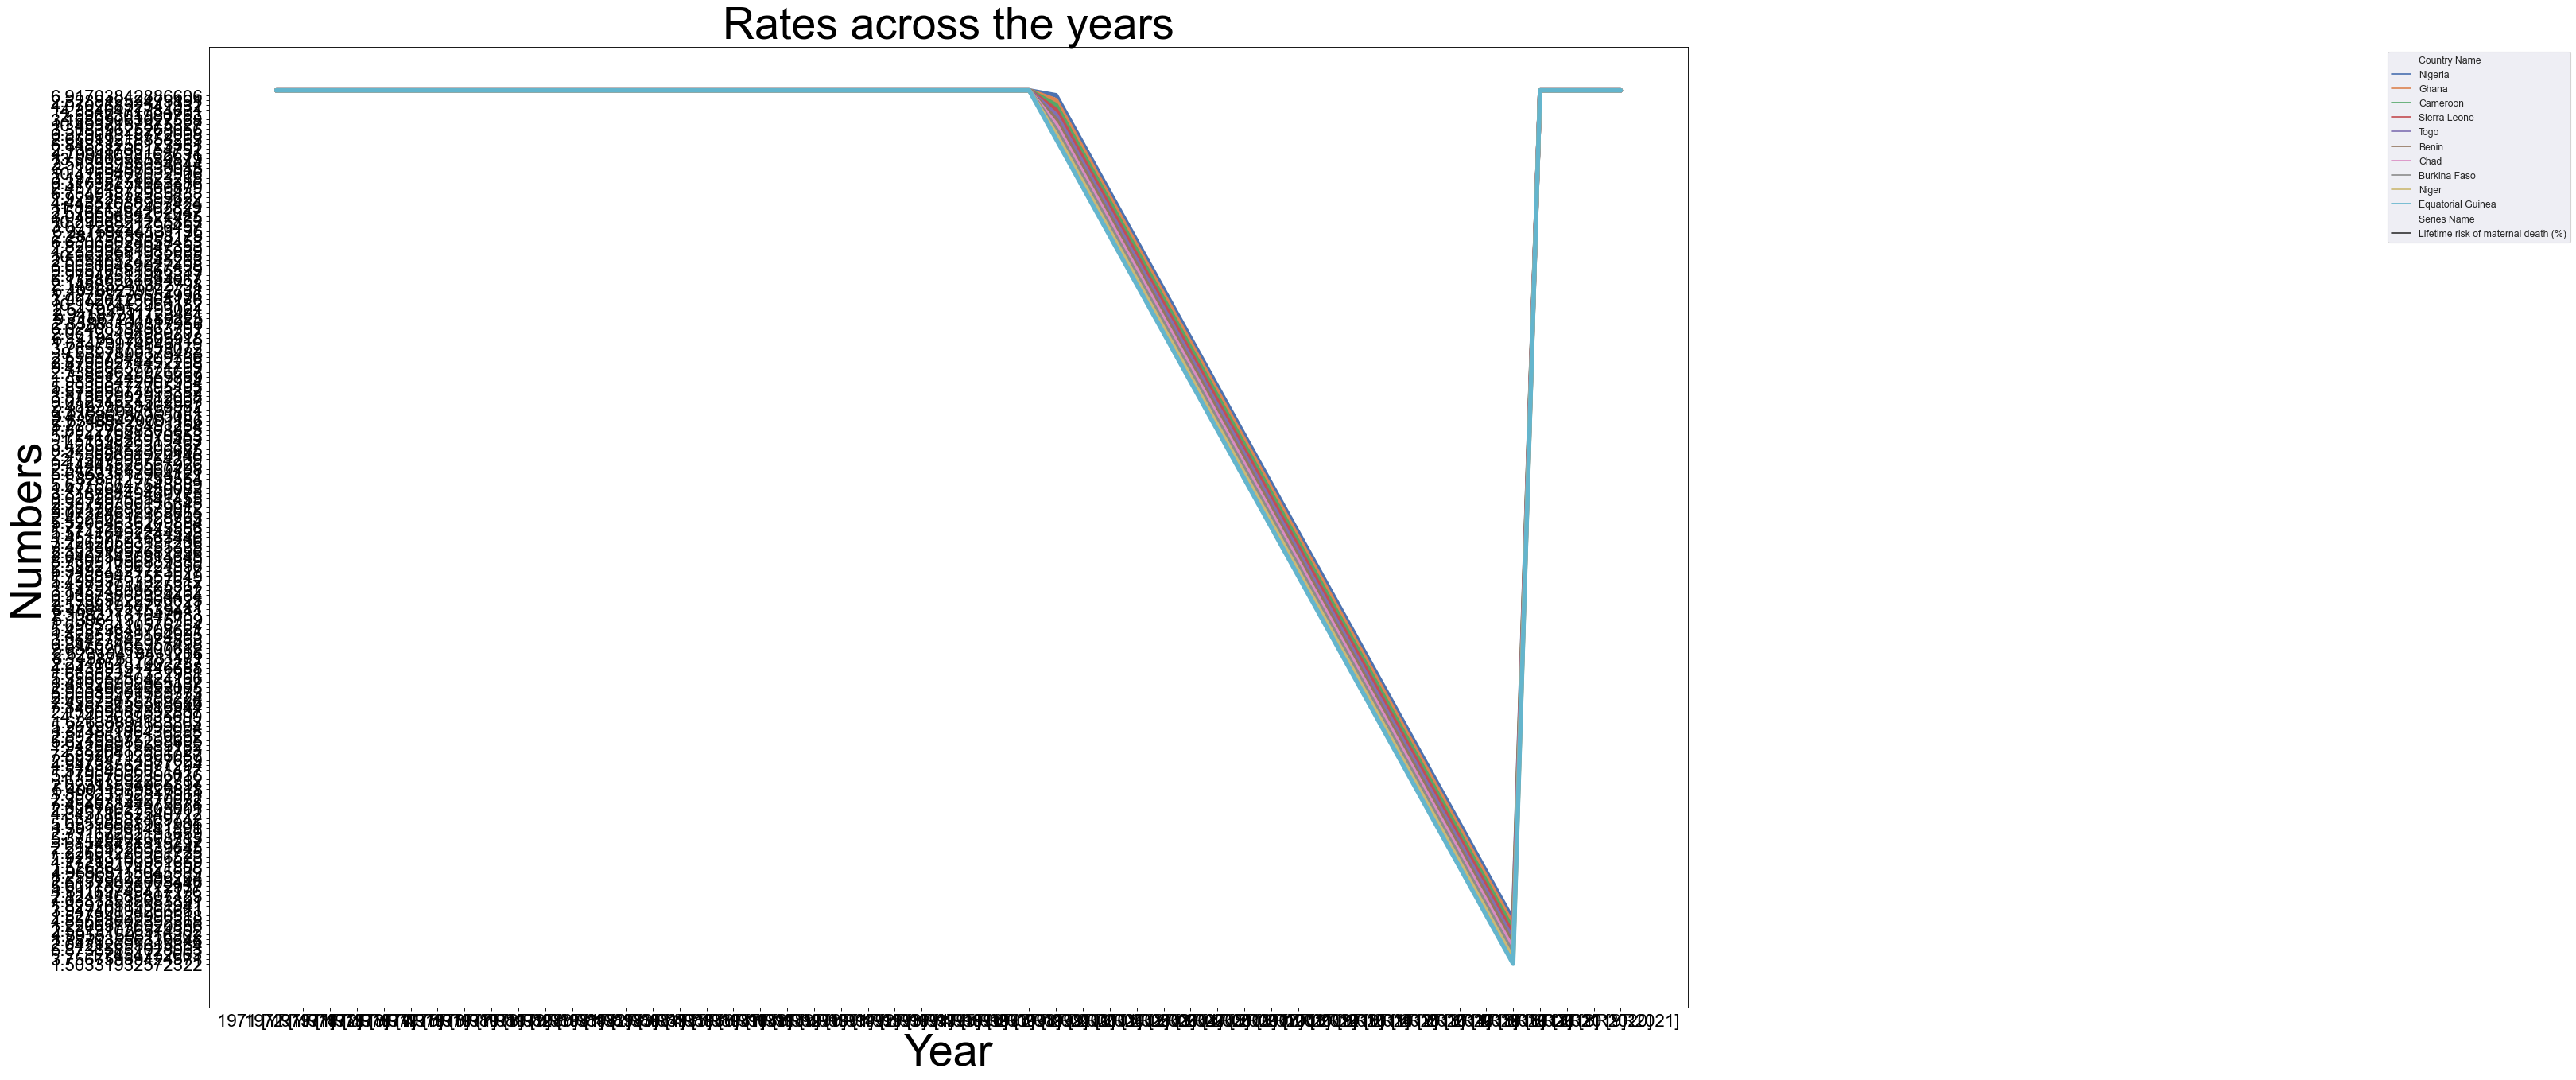

In [15]:
fig, ax =plt.subplots(figsize= (30,20), dpi = 80)
sns.set_theme(style="darkgrid")

sns.lineplot(y= "Rate", x= "Year", data = maternal_health_df, hue = "Country Name", linewidth =5, style = "Series Name", )

ax.set_title("Rates across the years", fontdict = {"fontsize":50})
ax.set_xlabel("Year", fontsize = 50)
ax.set_ylabel("Numbers", fontsize = 50)
ax.tick_params(labelsize = 20)
ax.legend(loc= "upper right", bbox_to_anchor=(1.6,1))
ax.grid(visible = True, which = "minor",  linewidth= 0.25 )
ax.autoscale(enable= True, axis = "both")

In [24]:
A_f_rate = pd.melt(A_f_rate, id_vars = ["Series Name", "Country Name"], var_name= "Year", value_name = "Rate")
A_f_rate.head()

,Series Name,Country Name,Year,Rate
0,"Adolescent fertility rate (births per 1,000 wo...",Nigeria,1960 [YR1960],163.956
1,"Adolescent fertility rate (births per 1,000 wo...",Ghana,1960 [YR1960],148.3448
2,"Adolescent fertility rate (births per 1,000 wo...",Cameroon,1960 [YR1960],171.3492
3,"Adolescent fertility rate (births per 1,000 wo...",Sierra Leone,1960 [YR1960],193.6694
4,"Adolescent fertility rate (births per 1,000 wo...",Togo,1960 [YR1960],151.1482


In [25]:
np.unique(list(A_f_rate["Country Name"]))

array(['Benin', 'Burkina Faso', 'Cameroon', 'Chad', 'Equatorial Guinea',
       'Ghana', 'Niger', 'Nigeria', 'Sierra Leone', 'Togo'], dtype='<U17')

In [46]:
A_f_rate["Rate"]= A_f_rate["Rate"].to_frame()



TypeError: no numeric data to plot

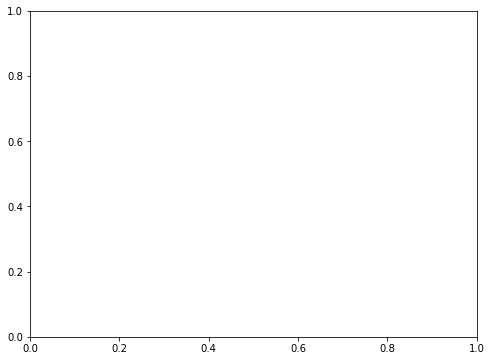

In [47]:
def plot_results(column_name):
    fig, ax = plt.subplots(figsize=(8,6))
       
    A_f_rate[(A_f_rate['Country Name'] == 'Benin') | 
            (A_f_rate['Country Name'] == 'Burkina Faso') | 
            (A_f_rate['Country Name'] == 'Cameroun') | 
            (A_f_rate['Country Name'] == 'Chad')| 
            (A_f_rate['Country Name'] == 'Equatorial Guinea')| 
            (A_f_rate['Country Name'] == 'Ghana')| 
            (A_f_rate['Country Name'] == 'Niger')| 
            (A_f_rate['Country Name'] == 'Nigeria')| 
            (A_f_rate['Country Name'] == 'Sierra Leone')| 
            (A_f_rate['Country Name'] == 'Togo')].groupby('Country Name').plot('Year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Benin', 'Burkina Faso', 'Cameroun', 'Chad', 'Equatorial Guinea', 'Ghana', 'Niger', 'Nigeria', 'Sierra Leone','Togo'])
    
plot_results('Rate')

In [76]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [106]:
plt.style.use("tableau-colorblind10")
palette = plt.get_cmap('tab10')
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes(0,0,1,1)

ax.set_title("Nigeria vs Ghana")

ax.plot(health["Country Name"],
        health["Series Name"])


TypeError: matplotlib.transforms.Bbox.from_bounds() argument after * must be an iterable, not int

<Figure size 720x432 with 0 Axes>

In [ ]:
x= health["Series Name"]

In [32]:
health_df = health_data["Series Name"].groupby('Adolescent fertility rate (births per 1,000 women ages 15-19)','Condom use at last high-risk sex, adult female (% ages 15-49)', 'Condom use, population ages 15-24, female (% of females ages 15-24)', 'Demand for family planning satisfied by any methods (% of married women with demand for family planning)','Lifetime risk of maternal death (1 in: rate varies by country)","Literacy rate, adult female (% of females ages 15 and above)','Maternal leave benefits (% of wages paid in covered period)','Maternal mortality ratio (modeled estimate, per 100,000 live births)', 
                                     'Nurses and midwives (per 1,000 people)","Pregnant women receiving prenatal care (%)',
                                       'Prevalence of anemia among pregnant women (%)',
                                      'Ratio of young literate females to males (% ages 15-24)'
                                       'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
                                       'Unmet need for contraception (% of married women ages 15-49)')
health_df.head()

KeyError: 'Series Name'

KeyError: "None of [Index(['Adolescent fertility rate (births per 1,000 women ages 15-19)',\n       'Condom use at last high-risk sex, adult female (% ages 15-49)',\n       'Condom use, population ages 15-24, female (% of females ages 15-24)',\n       'Demand for family planning satisfied by any methods (% of married women with demand for family planning)',\n       'Lifetime risk of maternal death (1 in: rate varies by country)',\n       'Literacy rate, adult female (% of females ages 15 and above)',\n       'Maternal leave benefits (% of wages paid in covered period)',\n       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',\n       'Nurses and midwives (per 1,000 people)',\n       'Pregnant women receiving prenatal care (%)',\n       'Prevalence of anemia among pregnant women (%)',\n       'Ratio of young literate females to males (% ages 15-24)',\n       'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',\n       'Unmet need for contraception (% of married women ages 15-49)'],\n      dtype='object')] are in the [index]"

In [27]:
health_df.head()

Series([], Name: Series Name, dtype: object)